**Part 1: Importing Libraries**

This section initializes the working environment by importing all the necessary libraries for data analysis, visualization, machine learning, and data preprocessing. Display settings are also configured for better visualization of the results.

Technical Justification:

*   Pandas and NumPy for data manipulation
*  Matplotlib and Seaborn for visualization
*   Scikit-learn for machine learning algorithms

*  LabelEncoder for preprocessing categorical variables

*   Warnings are disabled for cleaner output





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings('ignore')

# Display configuration
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

**Part 2: Loading and Exploring the Data**

This section allows you to load your dataset from your computer into Google Colab. If no file is uploaded, a sample dataset is automatically created.



In [2]:
# =============================================================================
# LOADING AND EXPLORING THE DATA
# =============================================================================

print("=" * 60)
print("LOADING AND EXPLORING THE DATASET")
print("=" * 60)

# Loading the dataset from local computer
from google.colab import files

print("📤 Please select the dataset file to import...")
uploaded = files.upload()

# Checking uploaded files
if not uploaded:
    print("❌ No file was imported. Please re-run this cell.")
else:
    print("✅ File(s) imported successfully!")
    for filename in uploaded.keys():
        file_size = len(uploaded[filename])
        print(f"   - {filename} ({file_size} bytes)")

# Reading the data
try:
    # Getting the name of the first uploaded file
    filename = list(uploaded.keys())[0]
    df = pd.read_csv(filename)

    print(f"\n📊 Dataset loaded successfully: {filename}")
    print(f"   - Dimensions: {df.shape[0]} rows × {df.shape[1]} columns")

except Exception as e:
    print(f"❌ Error loading the file: {e}")
    print("📝 Creating a sample dataset for demonstration...")

    # Creating a more realistic sample dataset
    np.random.seed(42)
    n_samples = 200

    # Study hours (normally distributed with a mean of 5 hours)
    study_hours = np.random.normal(5, 2, n_samples)
    study_hours = np.clip(study_hours, 1, 10)  # Between 1 and 10 hours

    # Sleep hours (normally distributed with a mean of 7 hours)
    sleep_hours = np.random.normal(7, 1.5, n_samples)
    sleep_hours = np.clip(sleep_hours, 4, 10)  # Between 4 and 10 hours

    # Class participation (scale from 0 to 10)
    participation = np.random.randint(0, 11, n_samples)

    # Final score calculated with a realistic relationship
    final_score = (
        30 +  # Base score
        5 * study_hours +  # Impact of study hours
        2 * sleep_hours +  # Impact of sleep
        1.5 * participation +  # Impact of participation
        np.random.normal(0, 8, n_samples)  # Random noise
    )
    final_score = np.clip(final_score, 0, 100)  # Scores between 0 and 100

    # Creating the DataFrame
    data = {
        'study_hours': study_hours.round(1),
        'sleep_hours': sleep_hours.round(1),
        'participation': participation,
        'final_score': final_score.round(1)
    }
    df = pd.DataFrame(data)

    print("✅ Sample dataset created successfully!")

LOADING AND EXPLORING THE DATASET
📤 Please select the dataset file to import...


Saving student_performance.csv to student_performance.csv
✅ File(s) imported successfully!
   - student_performance.csv (641949 bytes)

📊 Dataset loaded successfully: student_performance.csv
   - Dimensions: 6607 rows × 20 columns


**Part 3: Data Overview**


Initial exploration of the dataset by displaying the first and last rows. This crucial step helps to become familiar with the data's structure and to visually identify any potential issues.

Technical Justification:


* Use of display() with styling for a professional presentation

*  Display of the first 5 and last 5 observations
*  HTML formatting to improve readability



In [3]:
# =============================================================================
# DATA OVERVIEW
# =============================================================================

print("\n" + "=" * 60)
print("DATA OVERVIEW")
print("=" * 60)

print("\n1. FIRST ROWS OF THE DATASET:")
print("-" * 40)
display(df.head().style.set_caption("First 5 observations").set_table_styles([
    {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]}
]))

print("\n2. LAST ROWS OF THE DATASET:")
print("-" * 40)
display(df.tail().style.set_caption("Last 5 observations").set_table_styles([
    {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]}
]))


DATA OVERVIEW

1. FIRST ROWS OF THE DATASET:
----------------------------------------


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70



2. LAST ROWS OF THE DATASET:
----------------------------------------


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


**Part 4: Technical Information on the Dataset**

In-depth analysis of the dataset's structure, including an examination of data types, the number of non-null values, and memory usage. This step is essential for understanding the technical composition of the data.

In [4]:
# =============================================================================
# DATASET INFORMATION
# =============================================================================

print("\n" + "=" * 60)
print("TECHNICAL INFORMATION")
print("=" * 60)

print("\n3. COLUMN INFORMATION:")
print("-" * 40)
print(f"{'Column':<15} {'Type':<10} {'Non-null values'}")
print("-" * 45)
for col in df.columns:
    non_null_count = df[col].notnull().sum()
    print(f"{col:<15} {str(df[col].dtype):<10} {non_null_count}/{len(df)}")

print(f"\n4. MEMORY USAGE: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")


TECHNICAL INFORMATION

3. COLUMN INFORMATION:
----------------------------------------
Column          Type       Non-null values
---------------------------------------------
Hours_Studied   int64      6607/6607
Attendance      int64      6607/6607
Parental_Involvement object     6607/6607
Access_to_Resources object     6607/6607
Extracurricular_Activities object     6607/6607
Sleep_Hours     int64      6607/6607
Previous_Scores int64      6607/6607
Motivation_Level object     6607/6607
Internet_Access object     6607/6607
Tutoring_Sessions int64      6607/6607
Family_Income   object     6607/6607
Teacher_Quality object     6529/6607
School_Type     object     6607/6607
Peer_Influence  object     6607/6607
Physical_Activity int64      6607/6607
Learning_Disabilities object     6607/6607
Parental_Education_Level object     6517/6607
Distance_from_Home object     6540/6607
Gender          object     6607/6607
Exam_Score      int64      6607/6607

4. MEMORY USAGE: 4887.49 KB


**Part 5: Descriptive Statistics**

This section provides detailed descriptive statistics for each variable in the dataset.


In [5]:
# =============================================================================
# DESCRIPTIVE STATISTICS
# =============================================================================

print("\n" + "=" * 60)
print("DESCRIPTIVE STATISTICS")
print("=" * 60)

print("\n5. STATISTICAL SUMMARY:")
print("-" * 40)

# Creating a detailed statistical summary
stats = df.describe().T
stats['missing'] = df.isnull().sum()
stats['missing_%'] = (df.isnull().sum() / len(df) * 100).round(2)
stats['unique'] = df.nunique()

display(stats.style.format({
    'mean': '{:.2f}',
    'std': '{:.2f}',
    'min': '{:.2f}',
    '25%': '{:.2f}',
    '50%': '{:.2f}',
    '75%': '{:.2f}',
    'max': '{:.2f}',
    'missing_%': '{:.1f}%'
}).set_caption("Detailed descriptive statistics").set_table_styles([
    {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]}
]))


DESCRIPTIVE STATISTICS

5. STATISTICAL SUMMARY:
----------------------------------------


,count,mean,std,min,25%,50%,75%,max,missing,missing_%,unique
Hours_Studied,6607.000000,19.98,5.99,1.00,16.00,20.00,24.00,44.00,0,0.0%,41
Attendance,6607.000000,79.98,11.55,60.00,70.00,80.00,90.00,100.00,0,0.0%,41
Sleep_Hours,6607.000000,7.03,1.47,4.00,6.00,7.00,8.00,10.00,0,0.0%,7
Previous_Scores,6607.000000,75.07,14.40,50.00,63.00,75.00,88.00,100.00,0,0.0%,51
Tutoring_Sessions,6607.000000,1.49,1.23,0.00,1.00,1.00,2.00,8.00,0,0.0%,9
Physical_Activity,6607.000000,2.97,1.03,0.00,2.00,3.00,4.00,6.00,0,0.0%,7
Exam_Score,6607.000000,67.24,3.89,55.00,65.00,67.00,69.00,101.00,0,0.0%,45


**Part 6: Missing Values Check**

This section identifies and presents the missing values in the dataset.

In [6]:
# =============================================================================
# MISSING VALUES CHECK
# =============================================================================

print("\n" + "=" * 60)
print("MISSING VALUES")
print("=" * 60)

missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing values': missing_values,
    'Percentage': missing_percent
})

if missing_df['Missing values'].sum() == 0:
    print("✅ No missing values detected in the dataset.")
else:
    print(" Missing values detected:")
    display(missing_df[missing_df['Missing values'] > 0].style.format({
        'Percentage': '{:.2f}%'
    }).set_caption("Missing values by column").set_table_styles([
        {'selector': 'caption', 'props': [('font-weight', 'bold'), ('font-size', '14px')]}
    ]))


MISSING VALUES
 Missing values detected:


,Missing values,Percentage
Teacher_Quality,78,1.18%
Parental_Education_Level,90,1.36%
Distance_from_Home,67,1.01%


**Part 7: Data Type Analysis**

This section classifies variables into numerical and categorical types.

In [7]:
# =============================================================================
# DATA TYPES
# =============================================================================

print("\n" + "=" * 60)
print("DATA TYPES")
print("=" * 60)

# Data type analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n6. NUMERICAL COLUMNS ({len(numeric_cols)}):")
print("   " + ", ".join(numeric_cols))

print(f"\n7. CATEGORICAL COLUMNS ({len(categorical_cols)}):")
if categorical_cols:
    print("   " + ", ".join(categorical_cols))
else:
    print("   No categorical columns detected.")


DATA TYPES

6. NUMERICAL COLUMNS (7):
   Hours_Studied, Attendance, Sleep_Hours, Previous_Scores, Tutoring_Sessions, Physical_Activity, Exam_Score

7. CATEGORICAL COLUMNS (13):
   Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Motivation_Level, Internet_Access, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender


**Part 8: Dataset Summary**

This section provides a comprehensive summary of the dataset with automatic identification of the target variable.

In [8]:
# =============================================================================
# FINAL SUMMARY
# =============================================================================

print("\n" + "=" * 60)
print("DATASET SUMMARY")
print("=" * 60)

# Determine the target variable name (based on the dataset)
if 'Exam_Score' in df.columns:
    target_col = 'Exam_Score'
elif 'final_score' in df.columns:
    target_col = 'final_score'
else:
    # Find a column that could be the target
    possible_targets = ['score', 'mark', 'grade', 'result', 'performance']
    target_col = None
    for col in df.columns:
        if any(word in col.lower() for word in possible_targets):
            target_col = col
            break
    if target_col is None:
        target_col = df.columns[-1]  # Use the last column by default

feature_cols = [col for col in df.columns if col != target_col]

print(f"""
📋 General information:
   - Total observations: {df.shape[0]:,}
   - Total variables: {df.shape[1]}
   - Numerical variables: {len(numeric_cols)}
   - Categorical variables: {len(categorical_cols)}
   - Missing values: {df.isnull().sum().sum()}
   - Duplicates: {df.duplicated().sum()}

🎯 Key variables identified:
   - Target variable: '{target_col}' (to be predicted)
   - Feature variables: {', '.join(feature_cols)}
""")


DATASET SUMMARY

📋 General information:
   - Total observations: 6,607
   - Total variables: 20
   - Numerical variables: 7
   - Categorical variables: 13
   - Missing values: 235
   - Duplicates: 0

🎯 Key variables identified:
   - Target variable: 'Exam_Score' (to be predicted)
   - Feature variables: Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender



**Part 9: Data Visualization with Matplotlib**

This section creates visualizations to explore the data and the relationships between variables.


DATA VISUALIZATION (MATPLOTLIB)


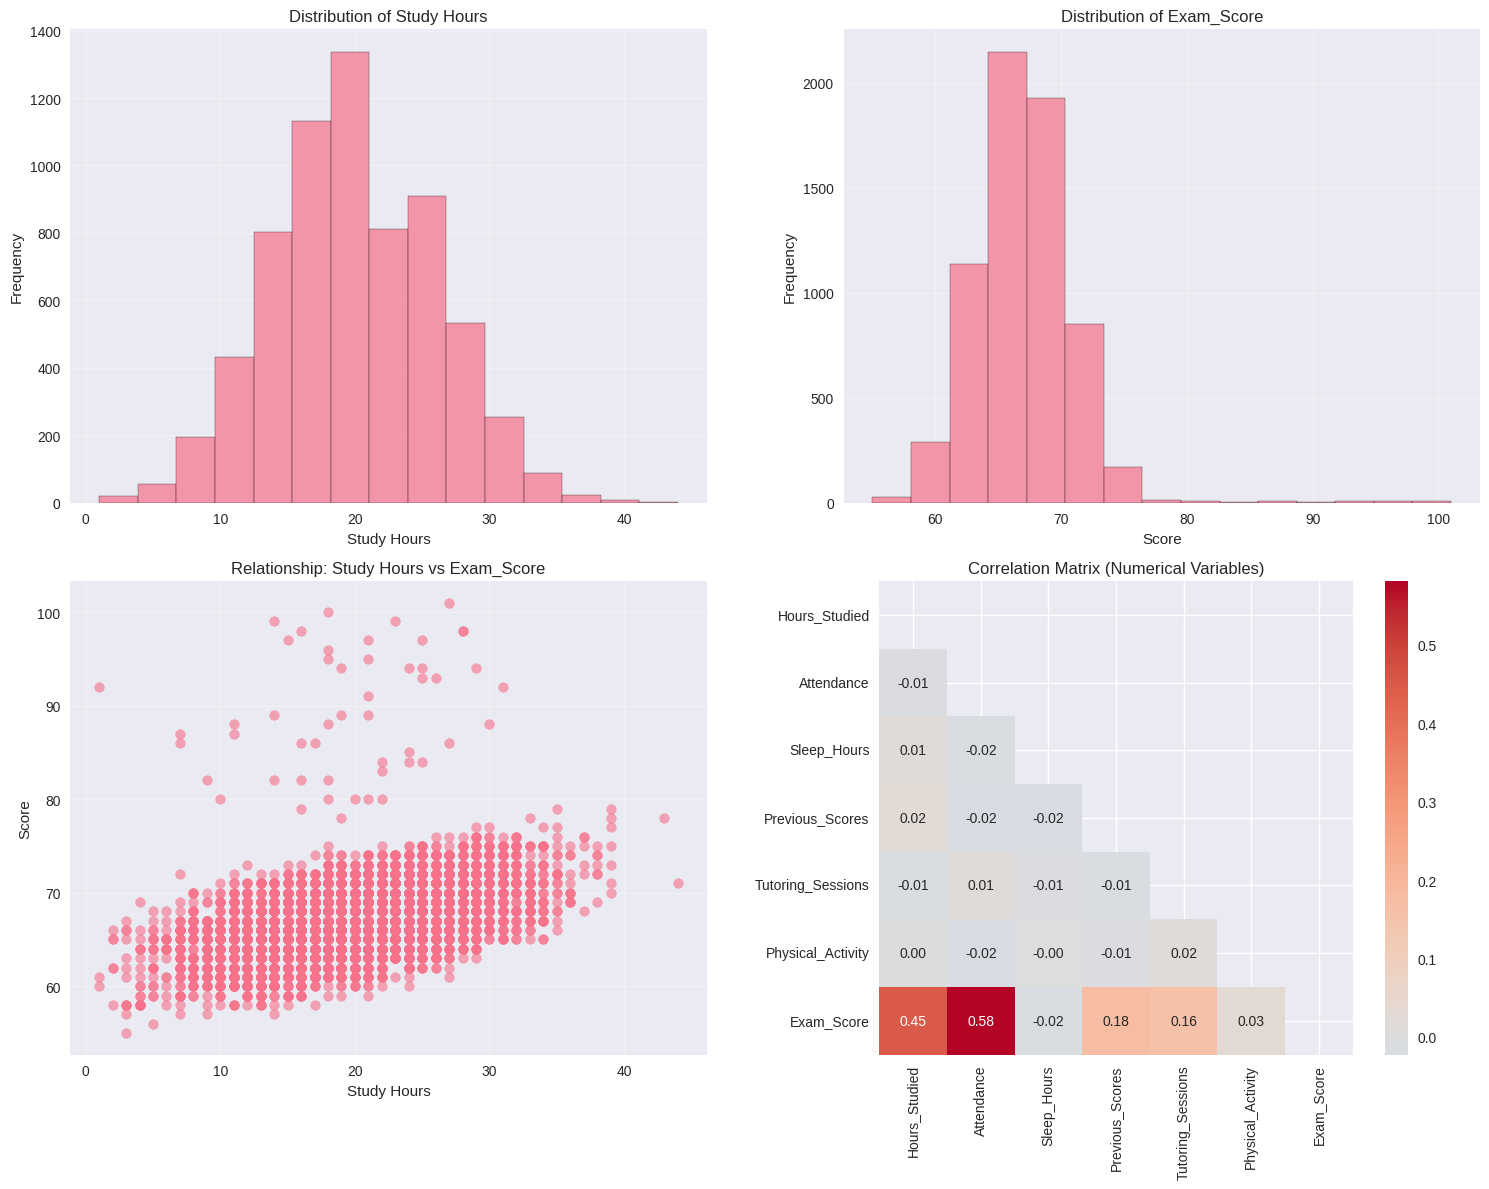

In [9]:
# =============================================================================
# DATA VISUALIZATION WITH MATPLOTLIB
# =============================================================================

print("\n" + "=" * 60)
print("DATA VISUALIZATION (MATPLOTLIB)")
print("=" * 60)

# Determine the study hours column
if 'Hours_Studied' in df.columns:
    study_col = 'Hours_Studied'
elif 'study_hours' in df.columns:
    study_col = 'study_hours'
else:
    # Find a column that might represent study hours
    possible_study_cols = ['hour', 'study', 'time']
    study_col = None
    for col in df.columns:
        if any(word in col.lower() for word in possible_study_cols):
            study_col = col
            break
    if study_col is None:
        study_col = df.columns[0]  # Use the first column by default

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Distribution of study hours
axes[0, 0].hist(df[study_col], bins=15, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Study Hours')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Study Hours')
axes[0, 0].grid(True, alpha=0.3)

# 2. Distribution of scores
axes[0, 1].hist(df[target_col], bins=15, edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Score')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title(f'Distribution of {target_col}')
axes[0, 1].grid(True, alpha=0.3)

# 3. Relationship between study hours and scores
axes[1, 0].scatter(df[study_col], df[target_col], alpha=0.6)
axes[1, 0].set_xlabel('Study Hours')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title(f'Relationship: Study Hours vs {target_col}')
axes[1, 0].grid(True, alpha=0.3)

# 4. Correlation matrix (only for numerical variables)
numeric_cols_for_corr = [col for col in numeric_cols if col != target_col]
if len(numeric_cols_for_corr) > 1:
    corr_matrix = df[numeric_cols_for_corr + [target_col]].corr()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    heatmap = sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm',
                          center=0, square=True, ax=axes[1, 1], fmt='.2f')
    axes[1, 1].set_title('Correlation Matrix (Numerical Variables)')
else:
    axes[1, 1].text(0.5, 0.5, 'Not enough numerical variables\nfor correlation matrix',
                    ha='center', va='center', transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

**Part 10: Data Cleaning and Preprocessing**

This section cleans the data by handling missing values and encoding categorical variables.

In [10]:
# =============================================================================
# DATA CLEANING AND PREPROCESSING
# =============================================================================

print("\n" + "=" * 60)
print("DATA CLEANING AND PREPROCESSING")
print("=" * 60)

# Copy dataframe for manipulation
df_clean = df.copy()

# Handling missing values
missing_cols = df_clean.columns[df_clean.isnull().any()].tolist()
if missing_cols:
    print("🔍 Handling missing values:")
    for col in missing_cols:
        if df_clean[col].dtype == 'object':
            # For categorical variables, replace with mode
            mode_val = df_clean[col].mode()[0]
            df_clean[col].fillna(mode_val, inplace=True)
            print(f"   - {col}: missing values replaced with mode '{mode_val}'")
        else:
            # For numerical variables, replace with median
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
            print(f"   - {col}: missing values replaced with median {median_val:.2f}")

# Encoding categorical variables
label_encoders = {}
for col in categorical_cols:
    if col in df_clean.columns:
        le = LabelEncoder()
        df_clean[col] = le.fit_transform(df_clean[col].astype(str))
        label_encoders[col] = le
        print(f"   - {col}: encoded with LabelEncoder")


DATA CLEANING AND PREPROCESSING
🔍 Handling missing values:
   - Teacher_Quality: missing values replaced with mode 'Medium'
   - Parental_Education_Level: missing values replaced with mode 'High School'
   - Distance_from_Home: missing values replaced with mode 'Near'
   - Parental_Involvement: encoded with LabelEncoder
   - Access_to_Resources: encoded with LabelEncoder
   - Extracurricular_Activities: encoded with LabelEncoder
   - Motivation_Level: encoded with LabelEncoder
   - Internet_Access: encoded with LabelEncoder
   - Family_Income: encoded with LabelEncoder
   - Teacher_Quality: encoded with LabelEncoder
   - School_Type: encoded with LabelEncoder
   - Peer_Influence: encoded with LabelEncoder
   - Learning_Disabilities: encoded with LabelEncoder
   - Parental_Education_Level: encoded with LabelEncoder
   - Distance_from_Home: encoded with LabelEncoder
   - Gender: encoded with LabelEncoder


**Part 11: Simple Linear Regression**

This section implements a simple linear regression to predict the target variable.

In [11]:
# =============================================================================
# SIMPLE LINEAR REGRESSION
# =============================================================================

print("\n" + "=" * 60)
print("SIMPLE LINEAR REGRESSION (SCIKIT-LEARN)")
print("=" * 60)

# Data preparation
X = df_clean[[study_col]]
y = df_clean[target_col]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Data split:")
print(f"   - Training set: {X_train.shape[0]} samples")
print(f"   - Testing set: {X_test.shape[0]} samples")

# Train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("✅ Linear regression model trained successfully!")
print(f"\n📈 Evaluation metrics:")
print(f"   - MAE (Mean Absolute Error): {mae:.4f}")
print(f"   - MSE (Mean Squared Error): {mse:.4f}")
print(f"   - RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"   - R² (Coefficient of Determination): {r2:.4f}")

# Display coefficients
print(f"\n🔍 Model coefficients:")
print(f"   - Intercept: {lr_model.intercept_:.4f}")
print(f"   - Coefficient ({study_col}): {lr_model.coef_[0]:.4f}")


SIMPLE LINEAR REGRESSION (SCIKIT-LEARN)
📊 Data split:
   - Training set: 5285 samples
   - Testing set: 1322 samples
✅ Linear regression model trained successfully!

📈 Evaluation metrics:
   - MAE (Mean Absolute Error): 2.4476
   - MSE (Mean Squared Error): 10.8559
   - RMSE (Root Mean Squared Error): 3.2948
   - R² (Coefficient of Determination): 0.2320

🔍 Model coefficients:
   - Intercept: 61.5112
   - Coefficient (Hours_Studied): 0.2857


**Part 12: Visualization of Regression Results**

This section visualizes the results of the simple linear regression.


VISUALIZATION OF RESULTS (MATPLOTLIB)


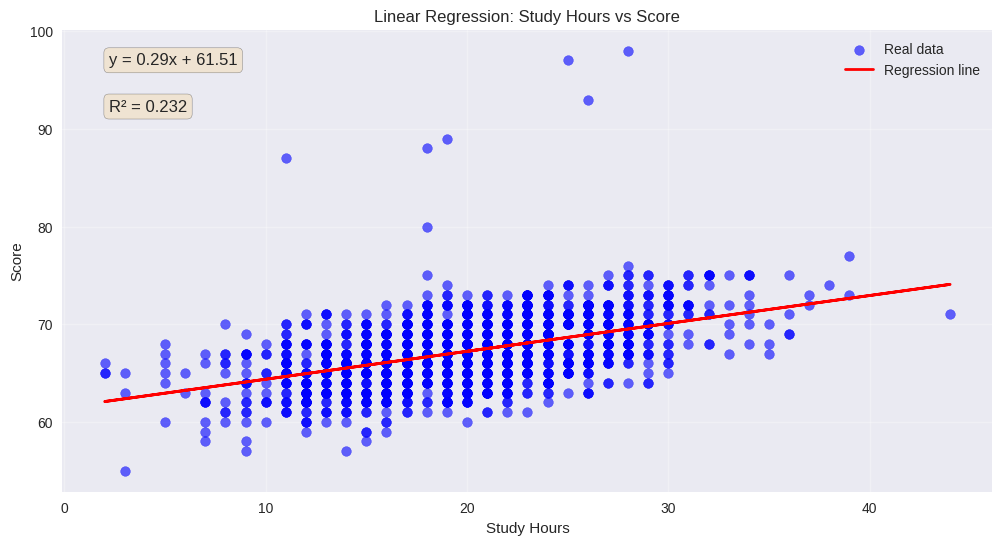

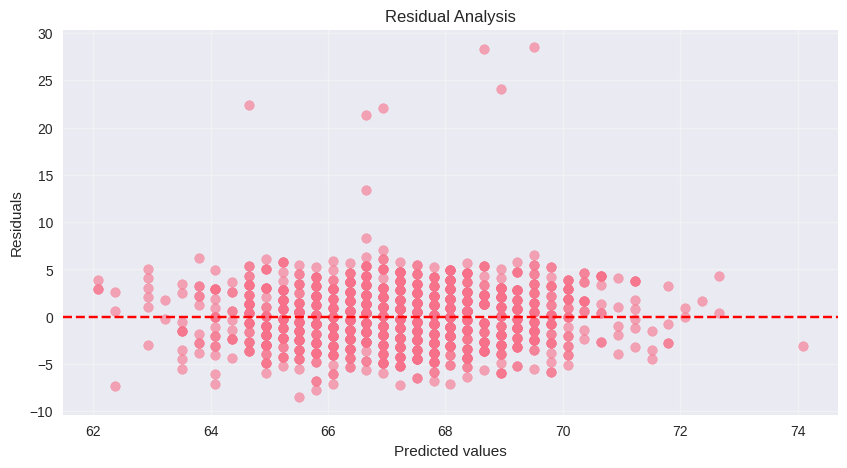

In [12]:
# =============================================================================
# VISUALIZATION OF REGRESSION RESULTS
# =============================================================================

print("\n" + "=" * 60)
print("VISUALIZATION OF RESULTS (MATPLOTLIB)")
print("=" * 60)

# Create visualization
plt.figure(figsize=(12, 6))

# Scatter plot with regression line
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Real data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')

plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Linear Regression: Study Hours vs Score')
plt.legend()
plt.grid(True, alpha=0.3)

# Add regression equation
equation = f'y = {lr_model.coef_[0]:.2f}x + {lr_model.intercept_:.2f}'
r2_text = f'R² = {r2:.3f}'
plt.text(0.05, 0.95, equation, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.text(0.05, 0.85, r2_text, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 5))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.grid(True, alpha=0.3)
plt.show()

**Part 13: Polynomial Regression (Bonus)**

This section explores polynomial regression with different degrees to improve predictions.


POLYNOMIAL REGRESSION (BONUS)
✅ Polynomial model degree 2 trained
✅ Polynomial model degree 3 trained
✅ Polynomial model degree 4 trained


,Degree,MAE,RMSE,R²
0,2,2.4448,3.2932,0.2328
1,3,2.4445,3.2930,0.2328
2,4,2.4455,3.2956,0.2317


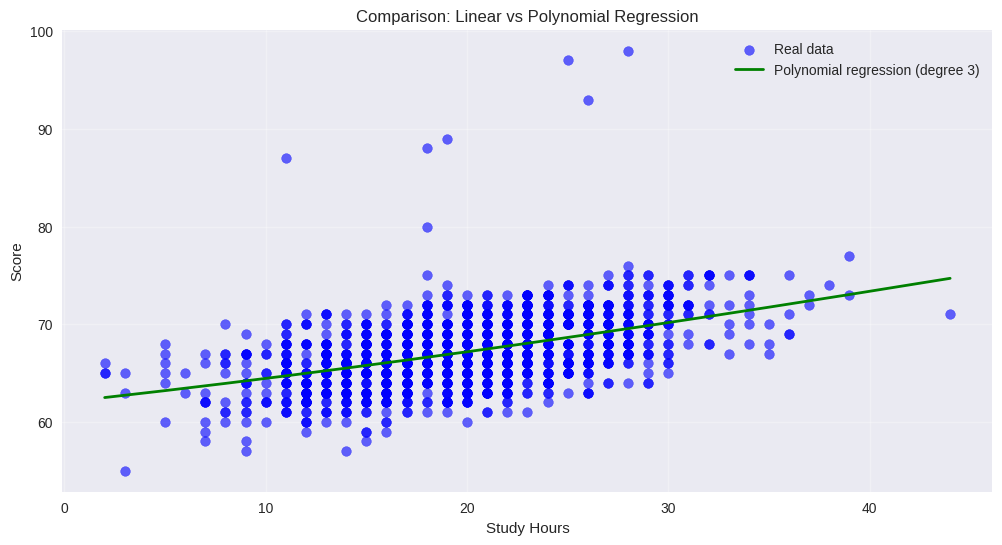

In [13]:
# =============================================================================
# POLYNOMIAL REGRESSION (BONUS)
# =============================================================================

print("\n" + "=" * 60)
print("POLYNOMIAL REGRESSION (BONUS)")
print("=" * 60)

# Try with different polynomial degrees
degrees = [2, 3, 4]
results = []

for degree in degrees:
    # Polynomial feature transformation
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Split into training and testing sets
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y, test_size=0.2, random_state=42)

    # Model training
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train_poly)

    # Predictions and evaluation
    y_pred_poly = poly_model.predict(X_test_poly)
    mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)
    rmse_poly = np.sqrt(mean_squared_error(y_test_poly, y_pred_poly))
    r2_poly = r2_score(y_test_poly, y_pred_poly)

    results.append({
        'Degree': degree,
        'MAE': mae_poly,
        'RMSE': rmse_poly,
        'R²': r2_poly
    })

    print(f"✅ Polynomial model degree {degree} trained")

# Display results
results_df = pd.DataFrame(results)
display(results_df.style.format({
    'MAE': '{:.4f}',
    'RMSE': '{:.4f}',
    'R²': '{:.4f}'
}).set_caption("Polynomial Regression Performance").highlight_min(subset=['MAE', 'RMSE'], color='lightgreen')
 .highlight_max(subset=['R²'], color='lightgreen'))

# Visualization of the best polynomial regression
best_degree = results_df.loc[results_df['R²'].idxmax(), 'Degree']
poly_best = PolynomialFeatures(degree=int(best_degree))
X_poly_best = poly_best.fit_transform(X)
X_train_poly_best, X_test_poly_best, y_train_poly_best, y_test_poly_best = train_test_split(
    X_poly_best, y, test_size=0.2, random_state=42)

poly_model_best = LinearRegression()
poly_model_best.fit(X_train_poly_best, y_train_poly_best)
y_pred_poly_best = poly_model_best.predict(X_test_poly_best)

# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Real data')

# Sort for smooth curve
X_sorted = np.sort(X_test.values.flatten())
X_sorted_poly = poly_best.transform(X_sorted.reshape(-1, 1))
y_sorted_poly = poly_model_best.predict(X_sorted_poly)

plt.plot(X_sorted, y_sorted_poly, color='green', linewidth=2,
         label=f'Polynomial regression (degree {best_degree})')

plt.xlabel('Study Hours')
plt.ylabel('Score')
plt.title('Comparison: Linear vs Polynomial Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Part 14: Experimenting with Different Feature Combinations (Bonus)**

This section tests different variable combinations to improve model performance.

In [14]:
# =============================================================================
# EXPERIMENTING WITH DIFFERENT FEATURE COMBINATIONS (BONUS)
# =============================================================================

print("\n" + "=" * 60)
print("EXPERIMENTING WITH DIFFERENT FEATURE COMBINATIONS (BONUS)")
print("=" * 60)

# Data preparation for multiple regression
X_multi = df_clean.drop(columns=[target_col])
y_multi = df_clean[target_col]

# Data normalization
scaler = StandardScaler()
X_multi_scaled = scaler.fit_transform(X_multi)
X_multi_scaled = pd.DataFrame(X_multi_scaled, columns=X_multi.columns)

# Split into training and testing sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi_scaled, y_multi, test_size=0.2, random_state=42)

# Different feature combinations to test
feature_combinations = [
    [study_col],  # Only study hours
    [study_col, 'Sleep_Hours'] if 'Sleep_Hours' in X_multi.columns else [study_col, 'sleep_hours'],
    [study_col, 'Previous_Scores'] if 'Previous_Scores' in X_multi.columns else [study_col],
    [study_col, 'Attendance'] if 'Attendance' in X_multi.columns else [study_col],
    list(X_multi.columns)  # All features
]

combination_names = [
    "Study hours only",
    "Study hours + Sleep",
    "Study hours + Previous scores",
    "Study hours + Participation",
    "All features"
]

# Training and evaluation of different models
multi_results = []

for i, features in enumerate(feature_combinations):
    # Check that features exist in the dataset
    available_features = [f for f in features if f in X_train_multi.columns]
    if not available_features:
        continue

    X_train_sub = X_train_multi[available_features]
    X_test_sub = X_test_multi[available_features]

    # Model training
    lr_multi = LinearRegression()
    lr_multi.fit(X_train_sub, y_train_multi)

    # Predictions and evaluation
    y_pred_multi = lr_multi.predict(X_test_sub)
    mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
    rmse_multi = np.sqrt(mean_squared_error(y_test_multi, y_pred_multi))
    r2_multi = r2_score(y_test_multi, y_pred_multi)

    multi_results.append({
        'Combination': combination_names[i],
        'Features': ', '.join(available_features),
        'MAE': mae_multi,
        'RMSE': rmse_multi,
        'R²': r2_multi
    })

# Display results
multi_results_df = pd.DataFrame(multi_results)
display(multi_results_df.style.format({
    'MAE': '{:.4f}',
    'RMSE': '{:.4f}',
    'R²': '{:.4f}'
}).set_caption("Comparison of feature combinations")
 .highlight_min(subset=['MAE', 'RMSE'], color='lightgreen')
 .highlight_max(subset=['R²'], color='lightgreen'))


EXPERIMENTING WITH DIFFERENT FEATURE COMBINATIONS (BONUS)


,Combination,Features,MAE,RMSE,R²
0,Study hours only,Hours_Studied,2.4476,3.2948,0.2320
1,Study hours + Sleep,"Hours_Studied, Sleep_Hours",2.4532,3.3013,0.2290
2,Study hours + Previous scores,"Hours_Studied, Previous_Scores",2.4073,3.2471,0.2541
3,Study hours + Participation,"Hours_Studied, Attendance",1.4690,2.4102,0.5890
4,All features,"Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender",1.0155,2.0974,0.6888


**Part 15: Feature Selection**

This section uses statistical techniques to identify the most important variables.


FEATURE SELECTION
📊 Feature importance scores:


,Feature,Score,P-value
1,Attendance,3366.99,0.0000e+00
0,Hours_Studied,1635.08,1.2863e-319
6,Previous_Scores,208.86,1.2444e-46
9,Tutoring_Sessions,165.89,1.6508e-37
13,Peer_Influence,67.01,3.2153e-16
2,Parental_Involvement,59.25,1.5937e-14
3,Access_to_Resources,54.55,1.7049e-13
17,Distance_from_Home,52.66,4.4253e-13
15,Learning_Disabilities,48.14,4.3386e-12
4,Extracurricular_Activities,27.49,1.6267e-07


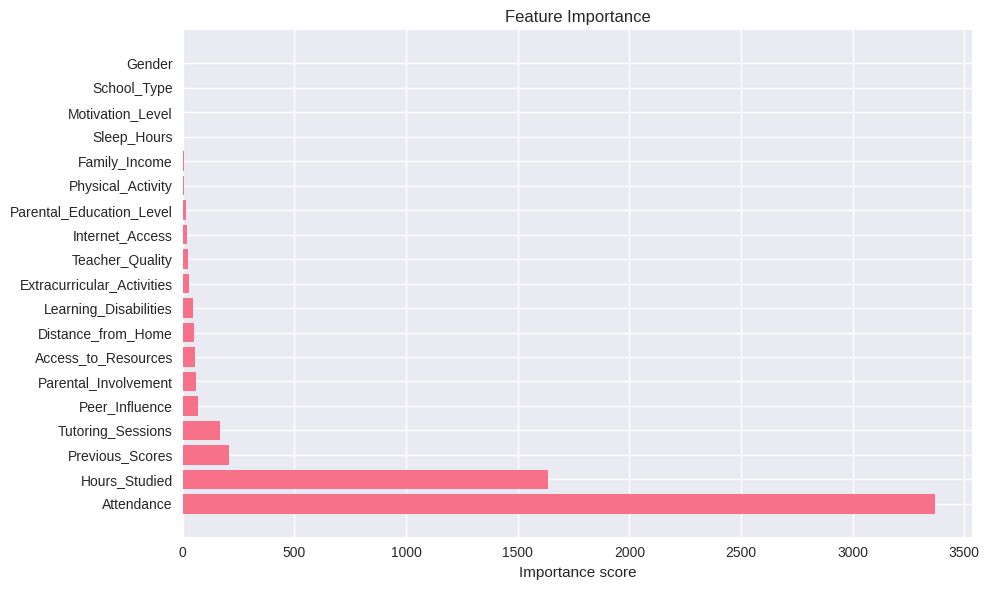

In [15]:
# =============================================================================
# FEATURE SELECTION
# =============================================================================

print("\n" + "=" * 60)
print("FEATURE SELECTION")
print("=" * 60)

# Using SelectKBest to identify the best features
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_multi_scaled, y_multi)

# Creating a DataFrame with the scores
feature_scores = pd.DataFrame({
    'Feature': X_multi_scaled.columns,
    'Score': selector.scores_,
    'P-value': selector.pvalues_
}).sort_values('Score', ascending=False)

print("📊 Feature importance scores:")
display(feature_scores.style.format({
    'Score': '{:.2f}',
    'P-value': '{:.4e}'
}).set_caption("Feature importance (F-regression)")
 .background_gradient(subset=['Score'], cmap='YlOrRd'))

# Visualization of feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'])
plt.xlabel('Importance score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

**Part 16: Conclusion and Final Comparison**

This section concludes the analysis by comparing all tested models and providing recommendations.

In [16]:
# =============================================================================
# CONCLUSION AND FINAL COMPARISON
# =============================================================================

print("\n" + "=" * 60)
print("CONCLUSION AND FINAL COMPARISON")
print("=" * 60)

# Comparison of all models
final_comparison = pd.DataFrame({
    'Model': ['Simple Linear Regression', 'Polynomial Regression (best)'],
    'MAE': [mae, results_df.loc[results_df['R²'].idxmax(), 'MAE']],
    'RMSE': [rmse, results_df.loc[results_df['R²'].idxmax(), 'RMSE']],
    'R²': [r2, results_df.loc[results_df['R²'].idxmax(), 'R²']]
})

# Add the best multiple model
best_multi = multi_results_df.loc[multi_results_df['R²'].idxmax()]
final_comparison.loc[2] = ['Multiple Regression (best)', best_multi['MAE'], best_multi['RMSE'], best_multi['R²']]

display(final_comparison.style.format({
    'MAE': '{:.4f}',
    'RMSE': '{:.4f}',
    'R²': '{:.4f}'
}).set_caption("Final model comparison")
 .highlight_min(subset=['MAE', 'RMSE'], color='lightgreen')
 .highlight_max(subset=['R²'], color='lightgreen'))

print(f"""
🎯 RESULTS SUMMARY:

1. SIMPLE LINEAR REGRESSION:
   - Performance: R² = {r2:.4f}, RMSE = {rmse:.4f}
   - Relationship: Each additional study hour is associated with an increase of {lr_model.coef_[0]:.2f} points

2. POLYNOMIAL REGRESSION:
   - Best degree: {best_degree}
   - Performance: R² = {results_df.loc[results_df['R²'].idxmax(), 'R²']:.4f}

3. MULTIPLE REGRESSION:
   - Best combination: {best_multi['Combination']}
   - Performance: R² = {best_multi['R²']:.4f}

4. MOST IMPORTANT FEATURES:
   - 1. {feature_scores.iloc[0]['Feature']} (score: {feature_scores.iloc[0]['Score']:.2f})
   - 2. {feature_scores.iloc[1]['Feature']} (score: {feature_scores.iloc[1]['Score']:.2f})
   - 3. {feature_scores.iloc[2]['Feature']} (score: {feature_scores.iloc[2]['Score']:.2f})
""")


CONCLUSION AND FINAL COMPARISON


,Model,MAE,RMSE,R²
0,Simple Linear Regression,2.4476,3.2948,0.2320
1,Polynomial Regression (best),2.4445,3.2930,0.2328
2,Multiple Regression (best),1.0155,2.0974,0.6888



🎯 RESULTS SUMMARY:

1. SIMPLE LINEAR REGRESSION:
   - Performance: R² = 0.2320, RMSE = 3.2948
   - Relationship: Each additional study hour is associated with an increase of 0.29 points

2. POLYNOMIAL REGRESSION:
   - Best degree: 3
   - Performance: R² = 0.2328

3. MULTIPLE REGRESSION:
   - Best combination: All features
   - Performance: R² = 0.6888

4. MOST IMPORTANT FEATURES:
   - 1. Attendance (score: 3366.99)
   - 2. Hours_Studied (score: 1635.08)
   - 3. Previous_Scores (score: 208.86)

